# Zadanie z predmetu IAU - Inteligentná analýza údajov
# 1. etapa - analýza údajov (dataset č.)
### Autori: Marcel Valent, Matej Pakán

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats
import pylab as py
import seaborn as sns
sns.set_theme(style="whitegrid", palette="mako")
sns.set_palette("mako")

In [5]:
stations= pd.read_csv("data/stations.csv", sep="\t")
measurements= pd.read_csv("data/measurements.csv", sep="\t")

In [8]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    1051 non-null   object 
 1   latitude   1051 non-null   float64
 2   code       1050 non-null   object 
 3   revision   1051 non-null   object 
 4   QoS        1051 non-null   object 
 5   longitude  1051 non-null   float64
dtypes: float64(2), object(4)
memory usage: 49.4+ KB


In [6]:
stations.head()

,station,latitude,code,revision,QoS,longitude
0,Vahdat,38.55632,TJ,2020-05-10,building,69.01354
1,Clermont,28.54944,US,2022/02/16,excellent,-81.77285
2,Teziutlan,19.81730,MX,"07/16/2018, 00:00:00",average,-97.35992
3,Sinhyeon,34.88250,KR,2015/03/23,good,128.62667
4,Corralillo,22.98212,CU,13 Feb 2017,excellent,-80.58556


In [9]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12128 entries, 0 to 12127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PAHs       12080 non-null  float64
 1   PM10       12079 non-null  float64
 2   C2H3NO5    12079 non-null  float64
 3   O3         12079 non-null  float64
 4   NH3        12080 non-null  float64
 5   Pb         12079 non-null  float64
 6   PRES       12128 non-null  float64
 7   CFCs       12079 non-null  float64
 8   longitude  12128 non-null  float64
 9   SO2        12079 non-null  float64
 10  latitude   12128 non-null  float64
 11  NOx        12078 non-null  float64
 12  warning    12079 non-null  float64
 13  CO         12079 non-null  float64
 14  CH4        12079 non-null  float64
 15  PM2.5      12080 non-null  float64
 16  H2CO       12080 non-null  float64
 17  TEMP       12080 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [10]:
measurements.head()

,PAHs,PM10,C2H3NO5,O3,NH3,Pb,PRES,CFCs,longitude,SO2,latitude,NOx,warning,CO,CH4,PM2.5,H2CO,TEMP
0,7.22628,9.07079,2.63533,9.95652,9.21864,29.98802,1093.16157,67.38361,144.23058,9.89682,-5.85746,10.31364,0.0,8.36810,9.75090,10.19732,59.16382,1.58478
1,10.39372,8.25541,1.19707,8.98772,9.82297,47.15361,1063.43896,69.62954,2.59753,8.29285,8.88649,10.26103,0.0,8.47772,9.60717,7.09990,65.37280,13.19832
2,9.56441,8.43278,1.32137,4.43270,8.08426,47.94224,1111.55551,77.84035,76.35484,8.42276,10.10649,6.11983,1.0,8.97045,8.89398,8.22953,47.62991,3.92248
3,10.78799,9.80691,5.28964,6.23420,8.38204,72.85236,1156.28181,59.70907,-59.13316,5.84252,-37.32167,8.65345,1.0,7.03998,11.94774,9.47408,68.73458,18.35811
4,5.64192,9.36108,3.44736,12.02213,8.93778,45.68778,1185.27302,67.19246,14.39024,12.57778,42.22718,10.49590,1.0,9.06782,6.62910,6.62591,56.52691,30.99446


In [15]:
stations.QoS.unique()

array(['building', 'excellent', 'average', 'good', 'accep', 'maintenance',
       'acceptable', 'maitennce'], dtype=object)

In [17]:
measurements.describe()

,PAHs,PM10,C2H3NO5,O3,NH3,Pb,PRES,CFCs,longitude,SO2,latitude,NOx,warning,CO,CH4,PM2.5,H2CO,TEMP
count,12080.000000,12079.000000,12079.000000,12079.000000,12080.000000,12079.000000,12128.000000,12079.000000,12128.000000,12079.000000,12128.000000,12078.000000,12079.000000,12079.000000,12079.000000,12080.000000,12080.000000,12080.000000
mean,8.793968,8.797577,3.347872,9.313817,8.802909,49.811462,1125.317323,72.086993,8.650963,8.817761,28.542629,9.316634,0.594834,8.799103,9.313261,8.782097,50.798744,14.916308
std,2.075501,0.990919,4.058859,1.909786,0.993687,12.760966,43.256345,7.163462,72.907597,1.947355,23.361763,1.691257,0.490944,1.002832,1.904806,2.077216,13.921643,9.948851
min,1.925340,5.187260,0.000000,2.048720,5.124910,0.000000,1050.000710,0.000000,-156.474320,1.029620,-54.800000,2.304540,0.000000,5.032870,2.492000,0.000000,0.000000,-26.219360
25%,7.341773,8.131340,1.198390,8.116235,8.130045,41.245430,1087.938682,67.299030,-67.154070,7.423280,13.701670,8.382302,0.000000,8.126020,8.034320,7.307308,41.520525,8.164428
50%,8.856765,8.793900,2.136050,9.470800,8.801375,49.701770,1125.809200,72.118240,7.227800,8.990970,36.208290,9.641905,1.000000,8.806680,9.426560,8.631215,50.683165,14.909530
75%,10.275723,9.464075,3.943880,10.666820,9.463235,58.367320,1162.680953,76.889705,68.888710,10.216680,45.040800,10.488043,1.000000,9.474650,10.650515,10.261252,60.104948,21.689912
max,17.068470,12.750440,100.000000,15.619060,12.763030,100.000000,1199.974700,100.000000,178.004170,15.856800,68.798330,14.915300,1.000000,12.576710,16.569680,16.646230,100.000000,52.722610


ModeResult(mode=nan, count=48)
4.307347516953628


<AxesSubplot: xlabel='PAHs', ylabel='Count'>

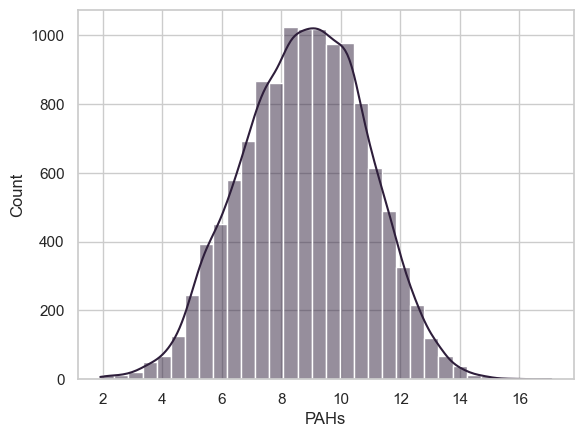

In [30]:
print(stats.mode(measurements["PAHs"],keepdims=False))
print(np.var(measurements["PAHs"]))
sns.histplot(data = measurements, x = "PAHs", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
0.9818381972441057


<AxesSubplot: xlabel='PM10', ylabel='Count'>

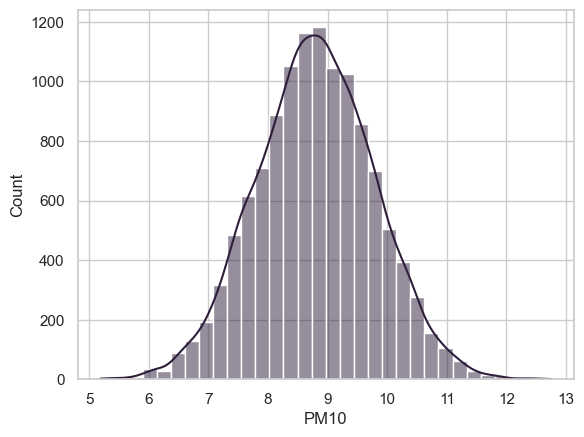

In [29]:
print(stats.mode(measurements["PM10"],keepdims=False))
print(np.var(measurements["PM10"]))
sns.histplot(data = measurements, x = "PM10", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
16.47297197854119


<AxesSubplot: xlabel='C2H3NO5', ylabel='Count'>

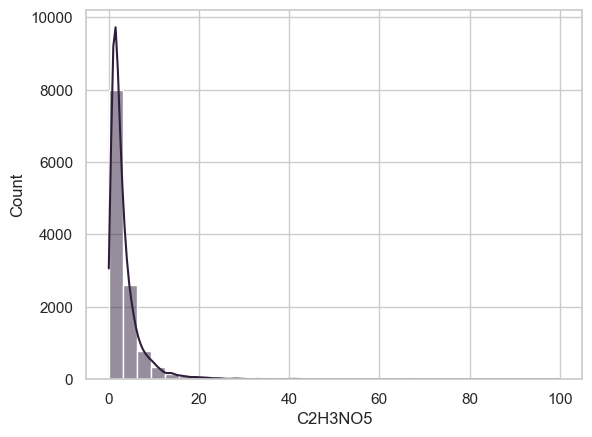

In [31]:
print(stats.mode(measurements["C2H3NO5"],keepdims=False))
print(np.var(measurements["C2H3NO5"]))
sns.histplot(data = measurements, x = "C2H3NO5", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
3.646980551471659


<AxesSubplot: xlabel='O3', ylabel='Count'>

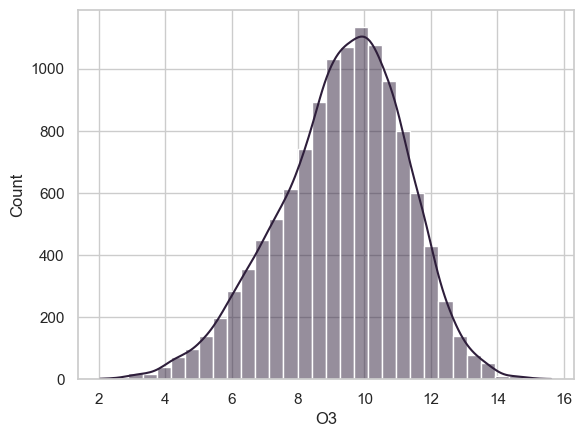

In [32]:
print(stats.mode(measurements["O3"],keepdims=False))
print(np.var(measurements["O3"]))
sns.histplot(data = measurements, x = "O3", kde=True, bins = 32)

ModeResult(mode=nan, count=48)
0.987332907324724


<AxesSubplot: xlabel='NH3', ylabel='Count'>

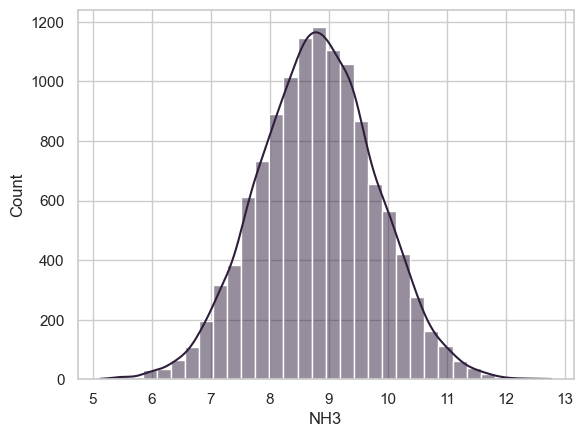

In [33]:
print(stats.mode(measurements["NH3"],keepdims=False))
print(np.var(measurements["NH3"]))
sns.histplot(data = measurements, x = "NH3", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
162.82875933673935


<AxesSubplot: xlabel='Pb', ylabel='Count'>

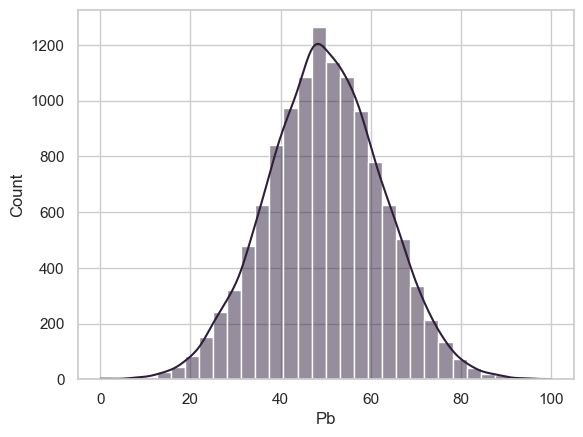

In [34]:
print(stats.mode(measurements["Pb"],keepdims=False))
print(np.var(measurements["Pb"]))
sns.histplot(data = measurements, x = "Pb", kde=True, bins = 32)

ModeResult(mode=1051.76413, count=2)
1870.9570643797556


<AxesSubplot: xlabel='PRES', ylabel='Count'>

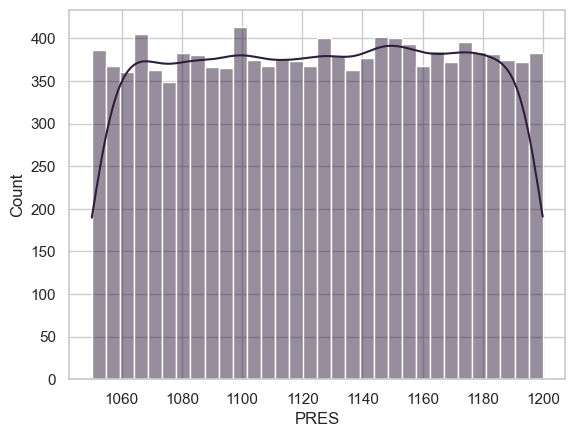

In [35]:
print(stats.mode(measurements["PRES"],keepdims=False))
print(np.var(measurements["PRES"]))
sns.histplot(data = measurements, x = "PRES", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
51.31093333934999


<AxesSubplot: xlabel='CFCs', ylabel='Count'>

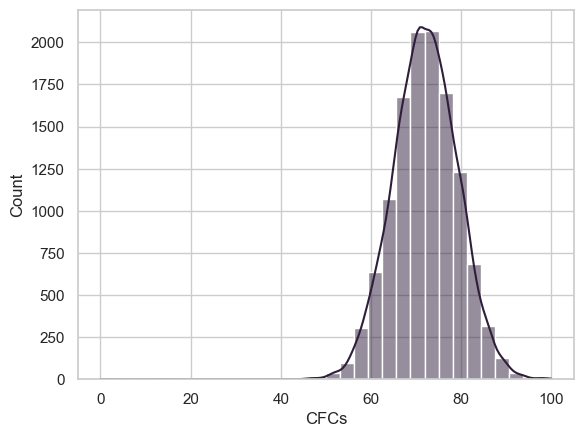

In [36]:
print(stats.mode(measurements["CFCs"],keepdims=False))
print(np.var(measurements["CFCs"]))
sns.histplot(data = measurements, x = "CFCs", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
3.791876709925959


<AxesSubplot: xlabel='SO2', ylabel='Count'>

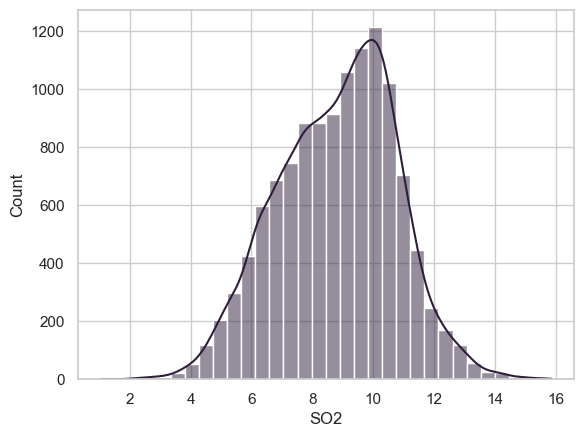

In [43]:
print(stats.mode(measurements["SO2"],keepdims=False))
print(np.var(measurements["SO2"]))
sns.histplot(data = measurements, x = "SO2", kde=True, bins = 32)

ModeResult(mode=nan, count=50)
2.8601150753868083


<AxesSubplot: xlabel='NOx', ylabel='Count'>

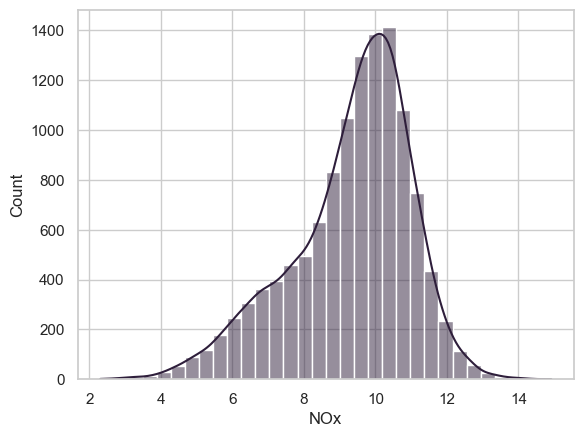

In [45]:
print(stats.mode(measurements["NOx"],keepdims=False))
print(np.var(measurements["NOx"]))
sns.histplot(data = measurements, x = "NOx", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
1.0055890884149394


<AxesSubplot: xlabel='CO', ylabel='Count'>

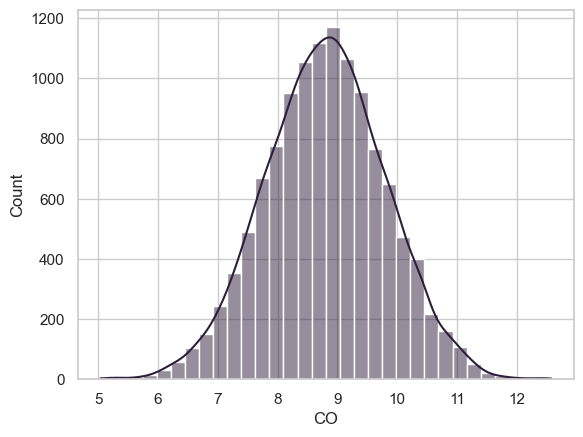

In [46]:
print(stats.mode(measurements["CO"],keepdims=False))
print(np.var(measurements["CO"]))
sns.histplot(data = measurements, x = "CO", kde=True, bins = 32)

ModeResult(mode=nan, count=49)
3.627983690605981


<AxesSubplot: xlabel='CH4', ylabel='Count'>

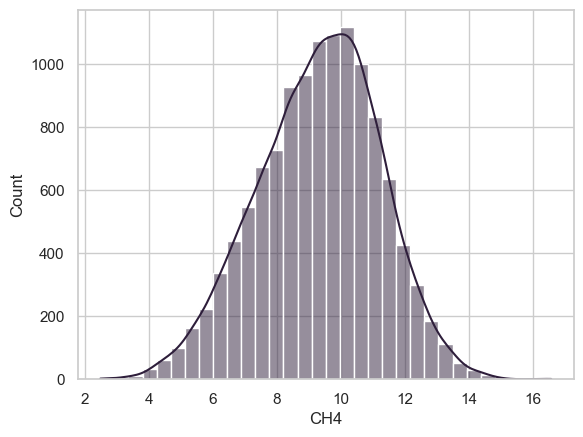

In [47]:
print(stats.mode(measurements["CH4"],keepdims=False))
print(np.var(measurements["CH4"]))
sns.histplot(data = measurements, x = "CH4", kde=True, bins = 32)

ModeResult(mode=nan, count=48)
4.314470874643766


<AxesSubplot: xlabel='PM2.5', ylabel='Count'>

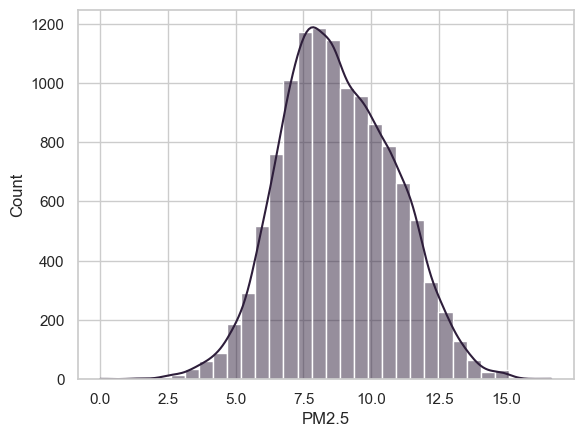

In [48]:
print(stats.mode(measurements["PM2.5"],keepdims=False))
print(np.var(measurements["PM2.5"]))
sns.histplot(data = measurements, x = "PM2.5", kde=True, bins = 32)

ModeResult(mode=nan, count=48)
193.7961051062859


<AxesSubplot: xlabel='H2CO', ylabel='Count'>

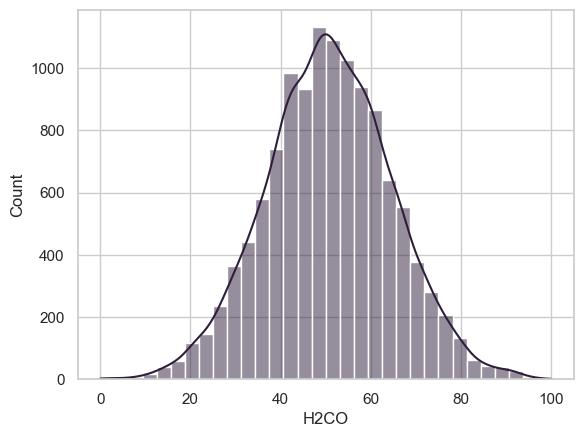

In [52]:
print(stats.mode(measurements["H2CO"],keepdims=False))
print(np.var(measurements["H2CO"]))
sns.histplot(data = measurements, x = "H2CO", kde=True, bins = 32)

ModeResult(mode=nan, count=48)
98.97143825668321


<AxesSubplot: xlabel='TEMP', ylabel='Count'>

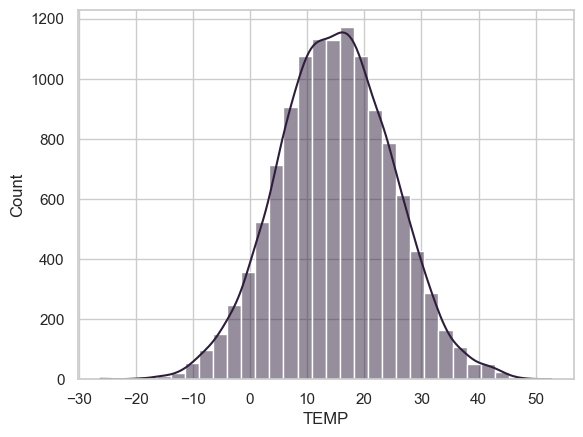

In [50]:
print(stats.mode(measurements["TEMP"],keepdims=False))
print(np.var(measurements["TEMP"]))
sns.histplot(data = measurements, x = "TEMP", kde=True, bins = 32)

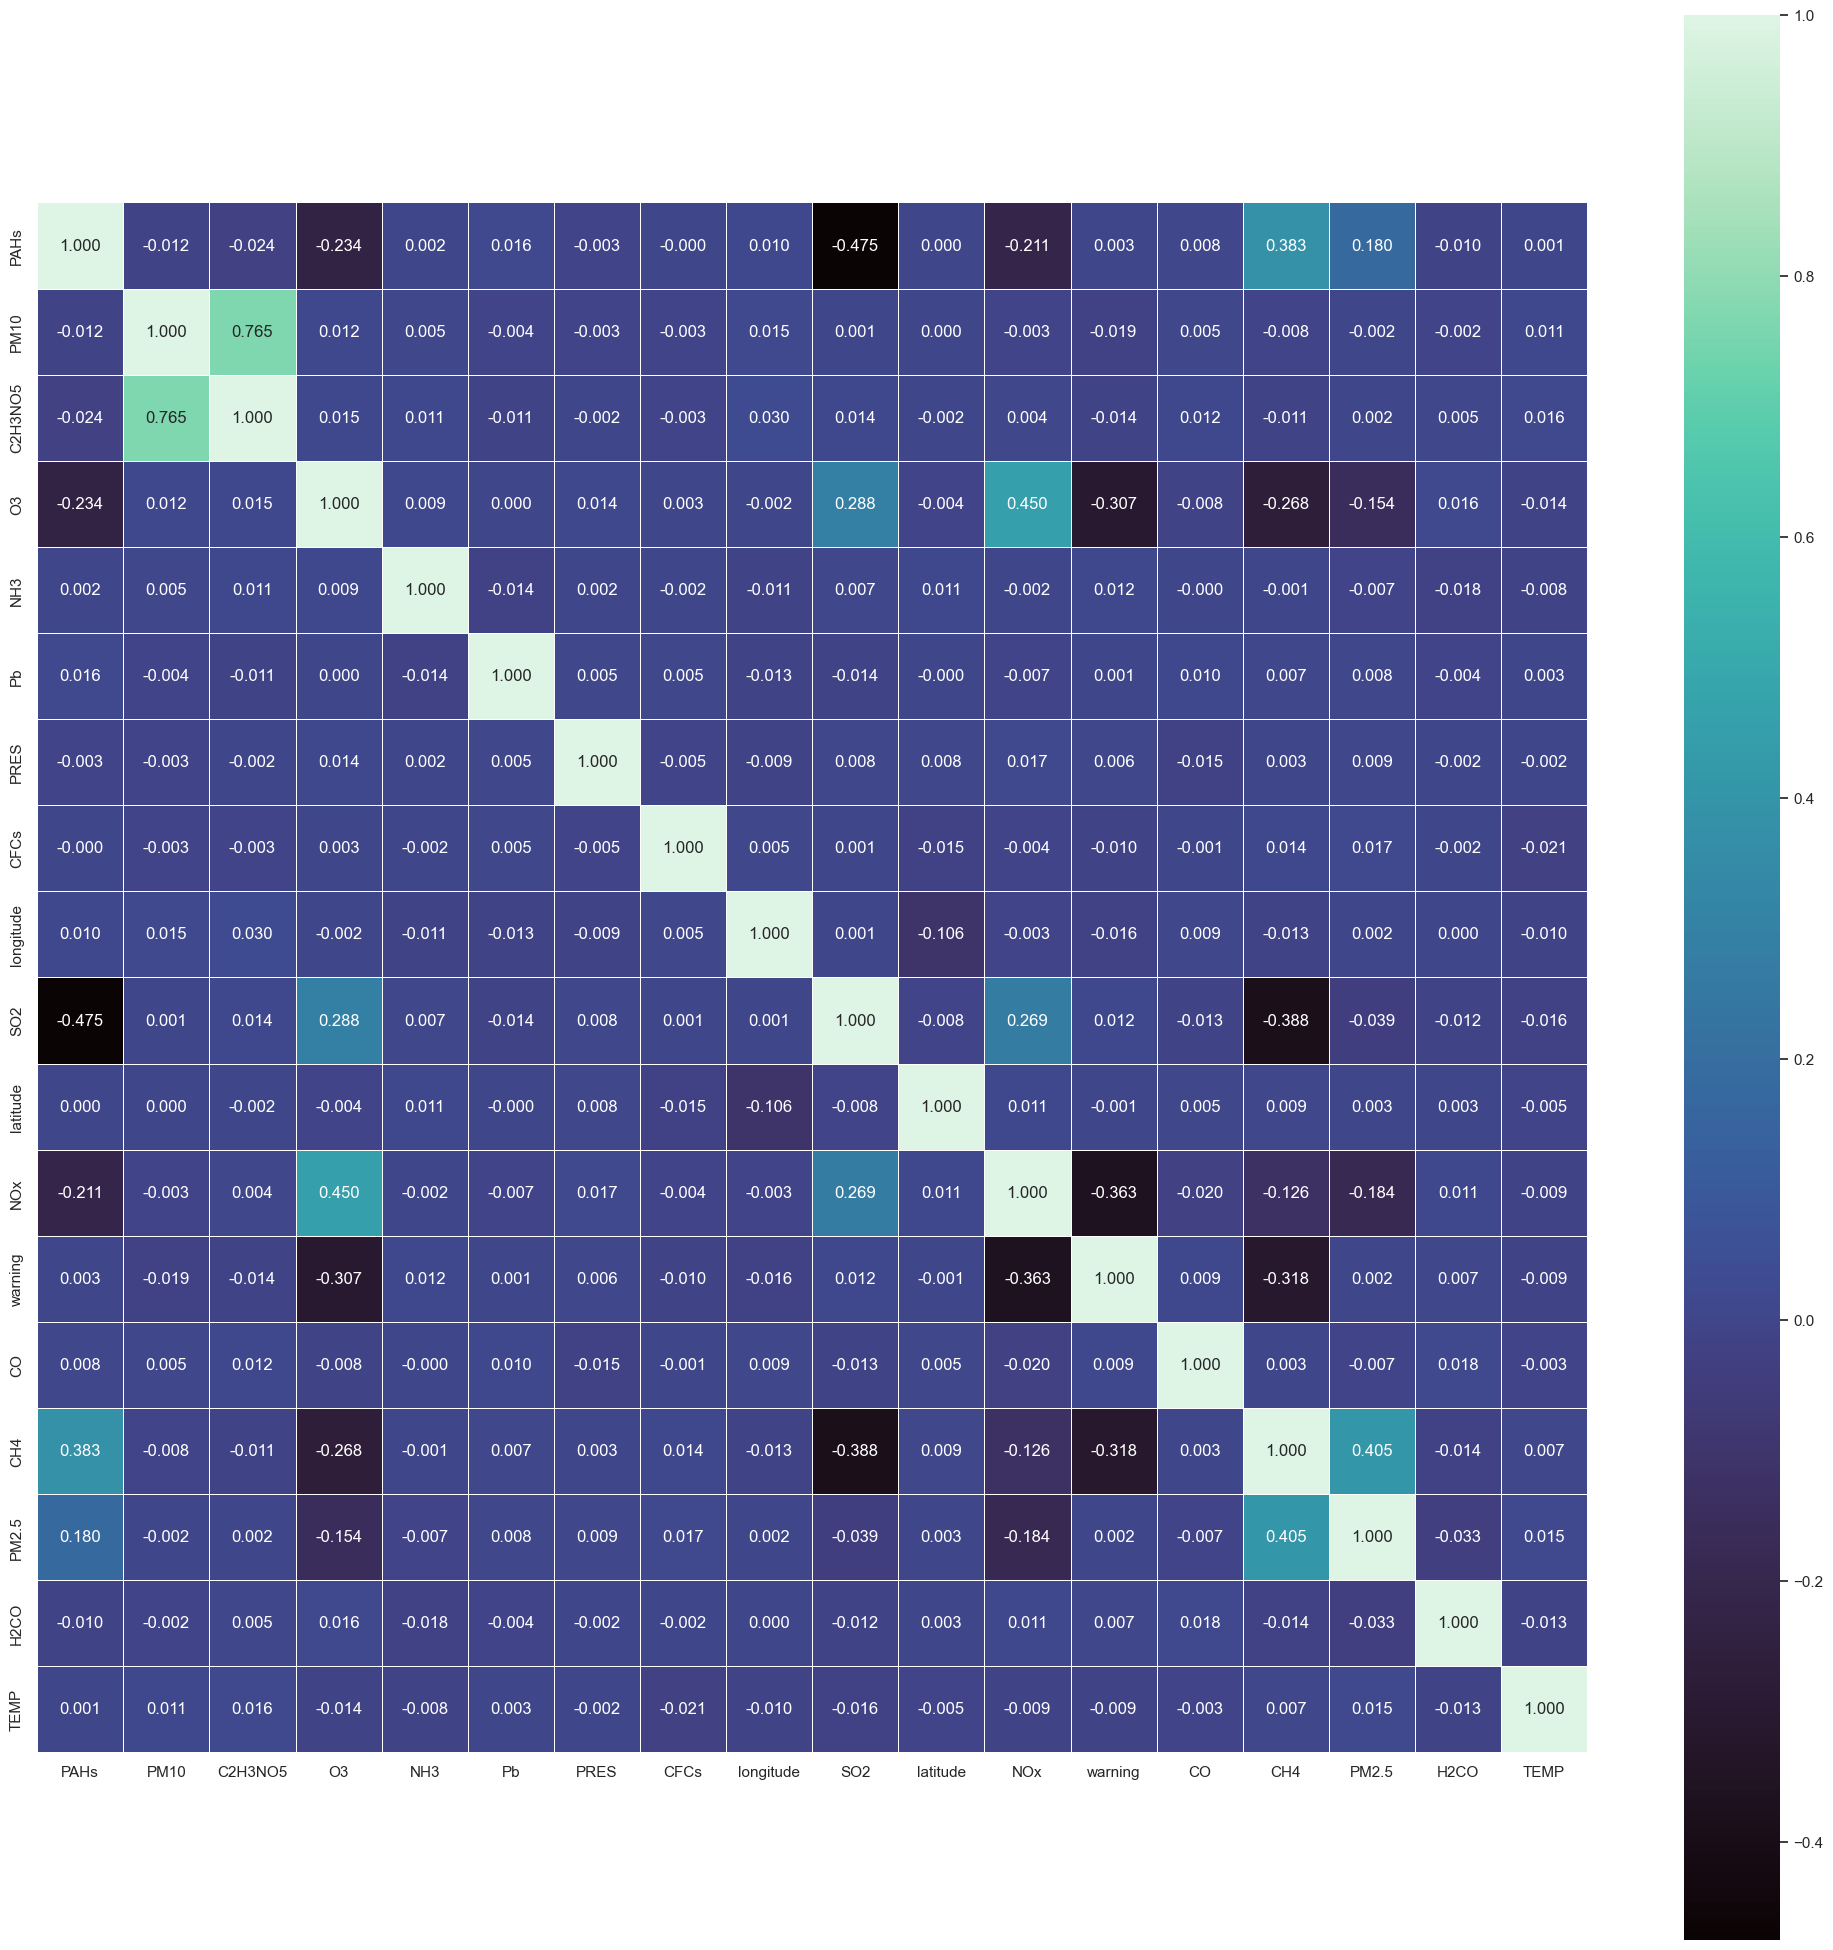

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(measurements.corr(), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'mako');